# Nettoyage du text

Etapes de néttoyage:
1. Mettre en minuscle le texte
2. Enlever les contractions
3. Enlever les espaces
4. Tokeniser le texte
5. Lemmatiser les mots
6. Enlever les éléments ininteréssant (chiffres, ponctuation, mots non anglais et lettres isolées)

In [2]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sys
from sklearn.feature_extraction.text import CountVectorizer


stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'three', 'four', 'five', 'six', 'seven',
                   'eight', 'nine', 'go', 'goes', 'get', 'also', 'however', 'tells']
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stopwords_list += [x for x in string.ascii_lowercase]


def clean_text(text):
    text = text.lower()

    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)

    text = text.strip(' ')
    text = nltk.word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stem_sentence = []
    for word in text:
        stem = lemmatizer.lemmatize(word)
        stem_sentence.append(stem)

    text = [w for w in stem_sentence if w not in stopwords_list]
    text = ' '.join(text)

    return text


if __name__ == "__main__":
    # to_csv("archive/dataset/test_data.txt", "test_data_clean.csv")
    # to_csv_train_solution("archive/dataset/test_data_solution.txt", "test_data_solution_clean.csv")
    with open("text.txt", "r", encoding="utf-8") as f:
        text = " ".join(f.readlines())
    print(text)
    print("-----------------------------------------------------")
    clean_text = clean_text(text)
    print(clean_text)


L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
-----------------------------------------------------
brane love life car apartment job especially girlfriend vespa day showering vespa run shampoo run across street convenience store buy quick trip minute return vespa gone every trace existence ha wiped life becomes tortured existence strange event another occurs confirm mind conspiracy working finding vespa


In [3]:
def to_csv(file, output):
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    df = pd.DataFrame(columns=["id", "title", "description"])

    for i in range(len(lines)):
        line = lines[i].split(":::")

        df_tmp = pd.DataFrame([(int(line[0]), line[1], clean_text(line[2]))], columns=["id", "title", "description"])
        df = df.append(df_tmp)
    df.to_csv(output)
    print(output, "Saved")

def to_csv_train_solution(file, output):
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    df = pd.DataFrame(columns=["id", "title", "genre", "description"])

    for i in range(len(lines)):
        line = lines[i].split(":::")

        df_tmp = pd.DataFrame([(int(line[0]), line[1], line[2], clean_text(line[3]))], columns=["id", "title", "genre", "description"])
        df = df.append(df_tmp)
    df.to_csv(output)
    print(output, "Saved")

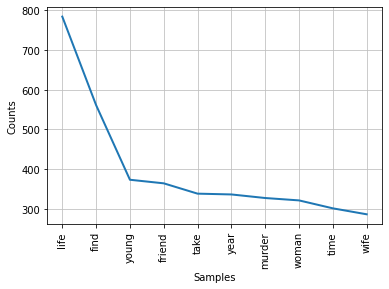

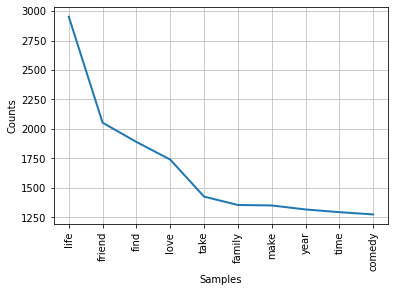

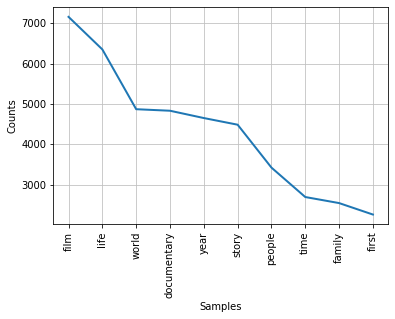

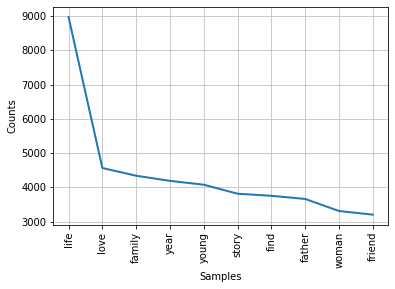

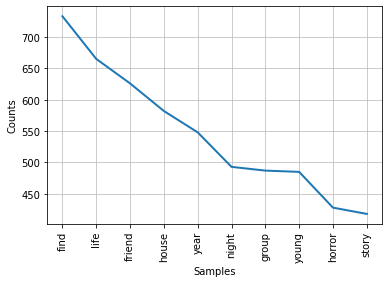

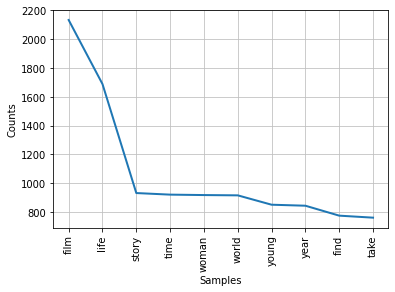

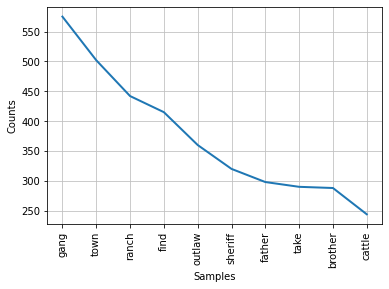

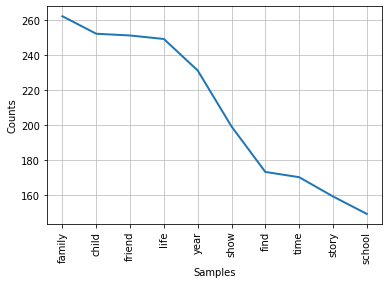

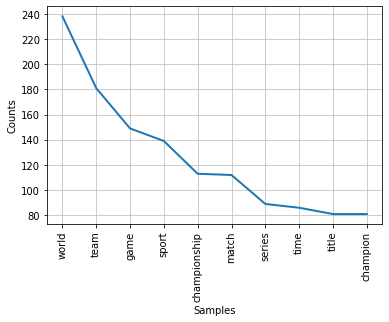

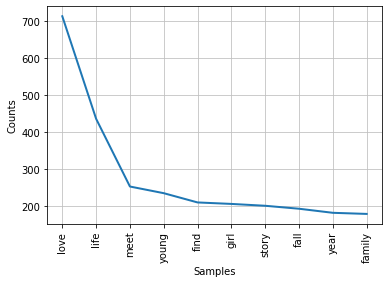

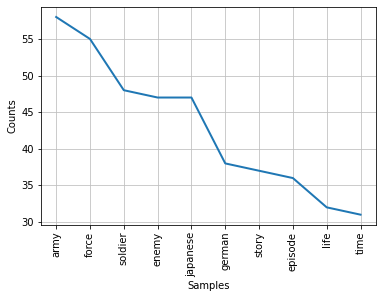

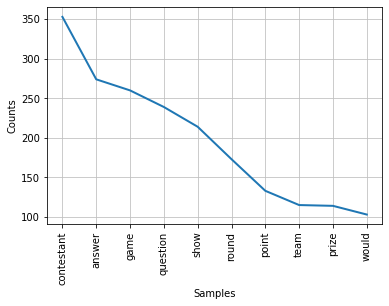

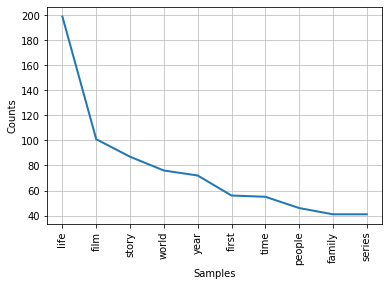

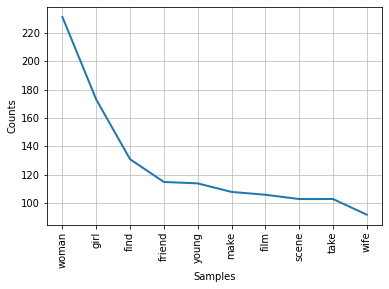

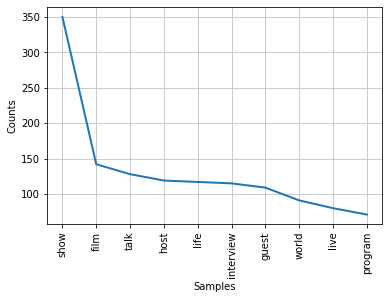

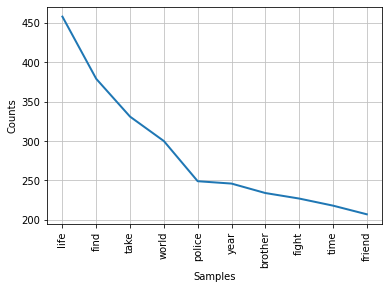

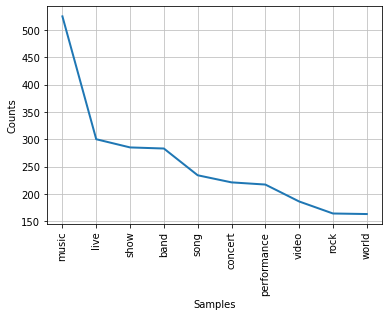

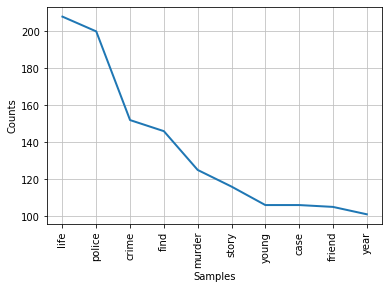

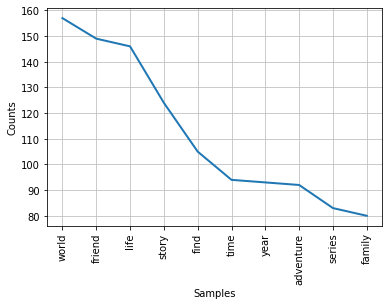

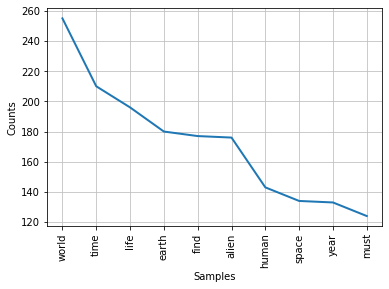

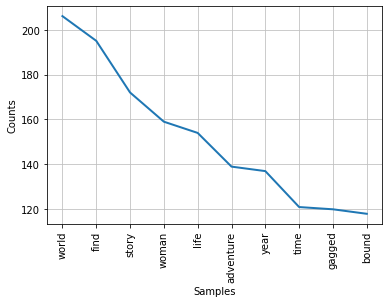

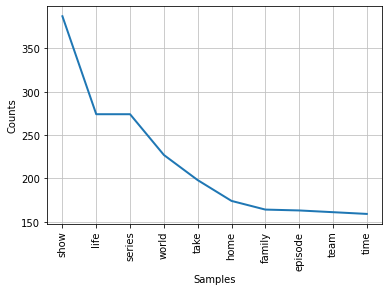

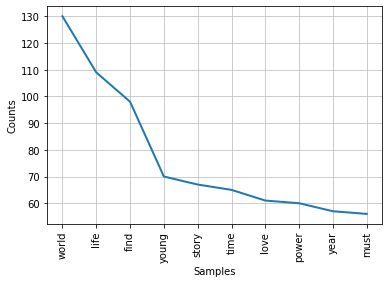

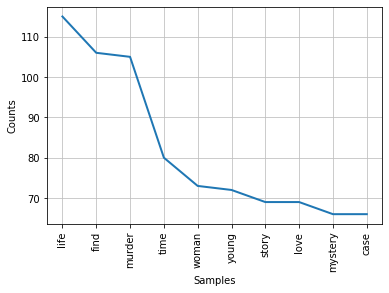

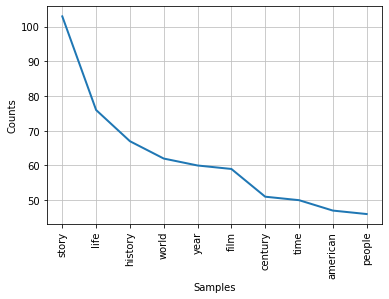

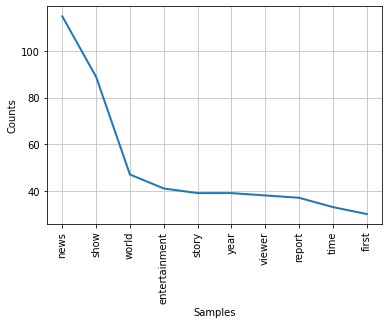

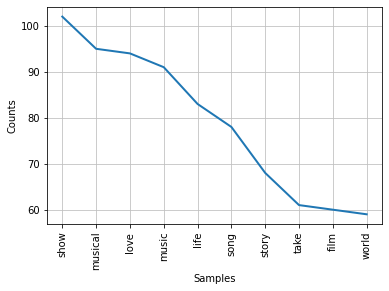

In [6]:
import matplotlib.pyplot as plt
import itertools


def word_frequeny():
    new_df = pd.read_csv("test_data_solution_clean.csv")
    print(new_df["genre"])
    drama_plot = new_df[new_df['genre'] == 'drama']

    drama_plotlist = [x for x in drama_plot['description'].str.split()]
    drama_plotlist = list(itertools.chain(*drama_plotlist))

    count = CountVectorizer()
    docs       = count.fit_transform(drama_plotlist)
    features   = count.get_feature_names()


    fig = plt.figure(figsize=(10, 10))
    plt.suptitle('Drama : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 20)
    plt.gcf().subplots_adjust(left=0.15)


    fig.show()



def word_frequeny2(df):
    #wt_words = webtext.words(text)

    texts_genre = {}

    for i in df.index:
        genre = df["genre"][i]
        if genre not in texts_genre:
            texts_genre[genre] = df["description"][i]
        else:
            texts_genre[genre] += " "
            texts_genre[genre] += df["description"][i]

    for text in texts_genre.values():

        data_analysis = nltk.FreqDist(text.split(" "))
        # print(list(data_analysis.elements()))

        # Let's take the specific words only if their frequency is greater than 3.
        filter_words = dict([(m, n)
                            for m, n in data_analysis.items() if len(m) > 3])
        # print(filter_words)
        # print(text)
        # for key in sorted(filter_words):
        #     print("%s: %s" % (key, filter_words[key]))

        data_analysis = nltk.FreqDist(filter_words)

        data_analysis.plot(10, cumulative=False)


if __name__ == "__main__":
    # word_frequeny()
    with open("text.txt", "r", encoding="utf-8") as f:
        text = " ".join(f.readlines())

    df = pd.read_csv("archive/dataset_csv/test_data_solution_clean.csv")

    word_frequeny2(df)